# Bundesratswahlen 2018

## Geschichte der BR-Wahlen seit 1848

**Quelle aller Daten: Admin.ch**

Wie viel Bundesräte pro Partei?....

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
from datetime import timedelta

In [3]:
plt.style.use('seaborn')

In [4]:
df = pd.read_csv("BR_OVERVIEW_NEU.csv")

In [5]:
df.head()

,ID,Name,Kanton,Eintritt BR,Austritt BR,Heimatort,ID Heimatort,Gewählt Wahlgang,Gewählt Stimmen,Absolutes Mehr,Stimmen ü aMehr,Partei
0,1,"Ochsenbein, Ulrich",BE,16.11.1848,31.12.1854,Nidau,NaN,1,92,67,25,FDP
1,2,"Naeff, Wilhelm Matthias",SG,16.11.1848,31.12.1875,Altstätten,NaN,1,72,65,7,FDP
2,3,"Munzinger, Martin J.",SO,16.11.1848,06.02.1855,Olten,NaN,2,71,67,4,FDP
3,4,"Furrer, Jonas",ZH,16.11.1848,25.07.1861,Winterthur,NaN,2,85,67,18,FDP
4,5,"Frey-Herosé, Friedrich",AG,16.11.1848,31.12.1866,Aarau,NaN,2,70,66,4,FDP


In [6]:
df.tail()

,ID,Name,Kanton,Eintritt BR,Austritt BR,Heimatort,ID Heimatort,Gewählt Wahlgang,Gewählt Stimmen,Absolutes Mehr,Stimmen ü aMehr,Partei
112,113,"Sommaruga, Simonetta",BE,22.09.2010,02.12.2018,"Lugano, Eggiwil",NaN,4,159,121,38,SP
113,114,"Schneider-Ammann, Johann N.",BE,22.09.2010,02.12.2018,Hasle bei Burgdorf,NaN,5,144,119,25,FDP
114,115,"Berset, Alain",FR,14.12.2011,02.12.2018,Misery-Courtion,NaN,2,126,123,3,SP
115,116,"Parmelin, Guy",VD,09.12.2015,02.12.2018,Bursins,NaN,3,138,119,19,SVP
116,117,"Cassis, Ignazio",TI,20.09.2017,02.12.2018,Sessa,NaN,2,125,123,2,FDP


In [7]:
len(df)

117

In [8]:
df.shape

(117, 12)

## Welcher Kanton hat die meisten Bundesräte

In [48]:
df["Kanton"].value_counts()

ZH    20
VD    15
BE    14
NE     9
TI     8
SO     6
LU     5
AG     5
SG     5
GE     5
FR     4
GR     4
VS     3
TG     3
BS     2
AR     2
ZG     2
AI     2
GL     1
OW     1
BL     1
Name: Kanton, dtype: int64

In [49]:
liste = df["Kanton"].value_counts()

In [50]:
path = "BR_Kanton_1848.csv"

liste.to_csv(path, index=True)

In [10]:
my_title = ("Anzahl Bundesräte pro Kanton seit 1848")

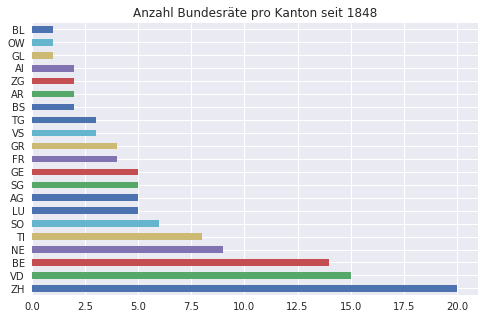

In [11]:
df["Kanton"].value_counts().head(26).plot(kind='barh', figsize=(8,5), title=my_title)

## Wie viele Wahlgänge werden benötigt

In [12]:
df["Gewählt Wahlgang"].value_counts()

1    72
2    17
3    10
5     8
4     6
6     4
Name: Gewählt Wahlgang, dtype: int64

In [51]:
liste = df["Gewählt Wahlgang"].value_counts()

In [52]:
path = "BR_AnzWahlgang_1848.csv"

liste.to_csv(path, index=True)

In [13]:
my_title = ("Wie viele Wahlgänge wurden zur Wahl benötigt?")

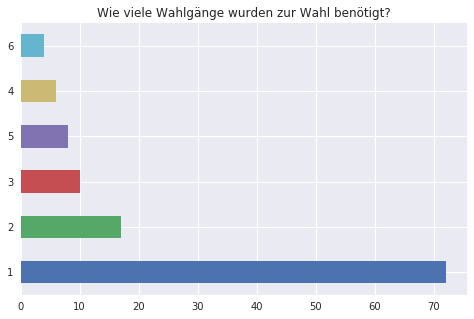

In [14]:
df["Gewählt Wahlgang"].value_counts().head(10).plot(kind='barh', figsize=(8,5), title=my_title)

## Wie viele Bundesräte pro Partei

In [15]:
df["Partei"].value_counts()

FDP                            70
CVP                            20
SP                             14
SVP                            10
BDP                             2
LIBERALE PARTEI DER SCHWEIZ     1
Name: Partei, dtype: int64

In [16]:
my_title = ("Wie viele Bundesräte pro Partei?")

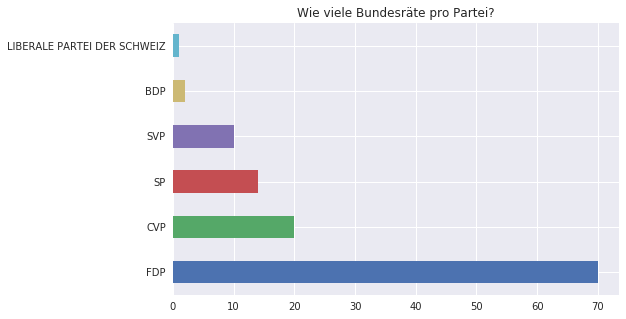

In [17]:
df["Partei"].value_counts().head(10).plot(kind='barh', figsize=(8,5), title=my_title)

## Wer wurde mit Glanzresultat gewählt

In [54]:
df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).head(3)

Name
Hoffmann, Arthur    89
Motta, Giuseppe     84
Feldmann, Markus    82
Name: Stimmen ü aMehr, dtype: int64

In [55]:
liste = df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).head(20)

In [56]:
path = "BR_Stimmen_ü_aMehr_1848.csv"

liste.to_csv(path, index=True)

In [20]:
my_title = ("Wer wurde mit Glanzresultat gewählt?")

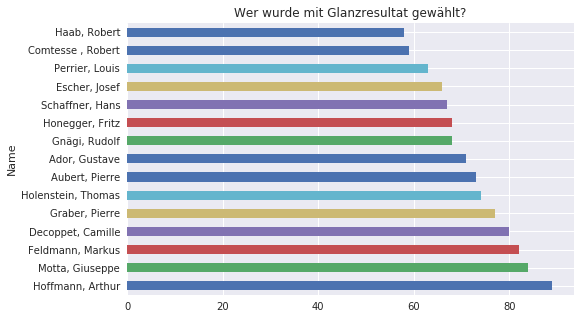

In [21]:
df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).head(15).plot(kind='barh', figsize=(8,5), title=my_title)

## Wer knapp über dem absoluten Mehr

In [22]:
df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).tail(20)

Name
Metzler-Arnold, Ruth              3
Ruchonnet , Antoine Louis John    3
Widmer-Schlumpf, Eveline          3
Challet-Venel, Jean-Jacques       3
Kopp, Elisabeth                   3
Frey, Emil                        3
Berset, Alain                     3
Egli, Alphons                     2
Cassis, Ignazio                   2
Ritschard, Willi                  2
Blocher, Christoph                2
Schenk, Karl                      1
Stich, Otto                       1
Franscini, Stefano                1
Droz, Numa                        0
Pioda, Giovanni Battista          0
Hammer, Bernhard                  0
Maurer, Ueli                      0
Meyer, Albert                     0
Deiss, Joseph                     0
Name: Stimmen ü aMehr, dtype: int64

In [23]:
my_title = ("Wer rutschte knapp in den Bundesrat?")

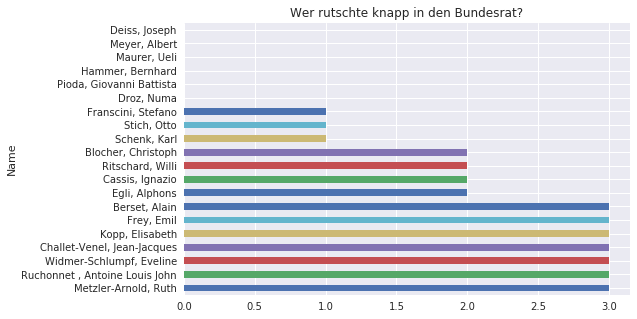

In [24]:
df.groupby("Name")["Stimmen ü aMehr"].sum().sort_values(ascending=False).tail(20).plot(kind='barh', figsize=(8,5), title=my_title)

## Übersicht über Parteien und Anzahl Wahlgänge

In [25]:
df.groupby("Partei")["Gewählt Wahlgang"].value_counts(ascending= False).head(30)

Partei                       Gewählt Wahlgang
BDP                          2                    1
                             6                    1
CVP                          1                   15
                             2                    2
                             4                    1
                             5                    1
                             6                    1
FDP                          1                   43
                             2                   11
                             3                    5
                             5                    5
                             4                    4
                             6                    2
LIBERALE PARTEI DER SCHWEIZ  1                    1
SP                           1                    8
                             3                    2
                             5                    2
                             2                    1
                  

In [60]:
df.groupby("Name")["Gewählt Wahlgang"].sum().sort_values(ascending= False).head(5)

Name
Deiss, Joseph                  6
Schmid, Samuel                 6
Stämpfli, Jakob                6
Challet-Venel, Jean-Jacques    6
Leuenberger, Moritz            5
Name: Gewählt Wahlgang, dtype: int64

## Übersicht über Parteien und Stimmen über absolutem Mehr


In [26]:
df.groupby("Stimmen ü aMehr")["Partei"].value_counts(ascending=False).head(120)

Stimmen ü aMehr  Partei                     
0                FDP                            4
                 CVP                            1
                 SVP                            1
1                FDP                            2
                 SP                             1
2                CVP                            1
                 FDP                            1
                 SP                             1
                 SVP                            1
3                FDP                            4
                 BDP                            1
                 CVP                            1
                 SP                             1
4                FDP                            3
                 BDP                            1
5                FDP                            4
6                FDP                            2
                 CVP                            1
7                FDP                            4
8    

## Wer war am längsten Bundesrat, wer am wenigsten lang

In [27]:
df["Eintritt neu"] = pd.to_datetime(df["Eintritt BR"], format="%d.%m.%Y")

In [28]:
df['Austritt neu'] = pd.to_datetime(df['Austritt BR'], format="%d.%m.%Y")

In [29]:
df.head()

,ID,Name,Kanton,Eintritt BR,Austritt BR,Heimatort,ID Heimatort,Gewählt Wahlgang,Gewählt Stimmen,Absolutes Mehr,Stimmen ü aMehr,Partei,Eintritt neu,Austritt neu
0,1,"Ochsenbein, Ulrich",BE,16.11.1848,31.12.1854,Nidau,NaN,1,92,67,25,FDP,1848-11-16,1854-12-31
1,2,"Naeff, Wilhelm Matthias",SG,16.11.1848,31.12.1875,Altstätten,NaN,1,72,65,7,FDP,1848-11-16,1875-12-31
2,3,"Munzinger, Martin J.",SO,16.11.1848,06.02.1855,Olten,NaN,2,71,67,4,FDP,1848-11-16,1855-02-06
3,4,"Furrer, Jonas",ZH,16.11.1848,25.07.1861,Winterthur,NaN,2,85,67,18,FDP,1848-11-16,1861-07-25
4,5,"Frey-Herosé, Friedrich",AG,16.11.1848,31.12.1866,Aarau,NaN,2,70,66,4,FDP,1848-11-16,1866-12-31


In [30]:
# df["Zeitspanne"] =df["Eintritt neu"]-df["Austritt neu"]

In [31]:
df["Zeitspanne"] = pd.Series(delta.days for delta in (df['Austritt neu'] - df['Eintritt neu']))

In [32]:
df.head()

,ID,Name,Kanton,Eintritt BR,Austritt BR,Heimatort,ID Heimatort,Gewählt Wahlgang,Gewählt Stimmen,Absolutes Mehr,Stimmen ü aMehr,Partei,Eintritt neu,Austritt neu,Zeitspanne
0,1,"Ochsenbein, Ulrich",BE,16.11.1848,31.12.1854,Nidau,NaN,1,92,67,25,FDP,1848-11-16,1854-12-31,2236
1,2,"Naeff, Wilhelm Matthias",SG,16.11.1848,31.12.1875,Altstätten,NaN,1,72,65,7,FDP,1848-11-16,1875-12-31,9906
2,3,"Munzinger, Martin J.",SO,16.11.1848,06.02.1855,Olten,NaN,2,71,67,4,FDP,1848-11-16,1855-02-06,2273
3,4,"Furrer, Jonas",ZH,16.11.1848,25.07.1861,Winterthur,NaN,2,85,67,18,FDP,1848-11-16,1861-07-25,4634
4,5,"Frey-Herosé, Friedrich",AG,16.11.1848,31.12.1866,Aarau,NaN,2,70,66,4,FDP,1848-11-16,1866-12-31,6619


In [33]:
versuch = df["Zeitspanne"] / 365

In [63]:
df.groupby("Name")["Zeitspanne"].sum().sort_values(ascending=False).head(20)

Name
Schenk, Karl                      11541
Deucher, Adolf                    10683
Motta, Giuseppe                   10267
Naeff, Wilhelm Matthias            9906
Etter, Philipp                     9409
Welti, Emil                        9154
Müller, Eduard                     8850
Schulthess, Edmund                 8307
Knüsel , Melchior Josef Martin     7475
Frey-Herosé, Friedrich             6619
Droz, Numa                         6223
Petitpierre, Max                   6042
Zemp, Joseph                       6026
Pilet-Golaz, Marcel                5862
Leuenberger, Moritz                5513
Furgler, Kurt                      5502
Hammer, Bernhard                   5500
Forrer, Ludwig                     5499
Villiger, Kaspar                   5446
Musy, Jean-Marie                   5254
Name: Zeitspanne, dtype: int64

In [68]:
liste = df.groupby("Name")["Zeitspanne"].sum().sort_values(ascending=False).head(120)

In [69]:
path = "BR_am_langsten_Amt_1848.csv"

liste.to_csv(path, index=True)

In [35]:
my_title = ("Welcher BR war am längsten im Amt?")

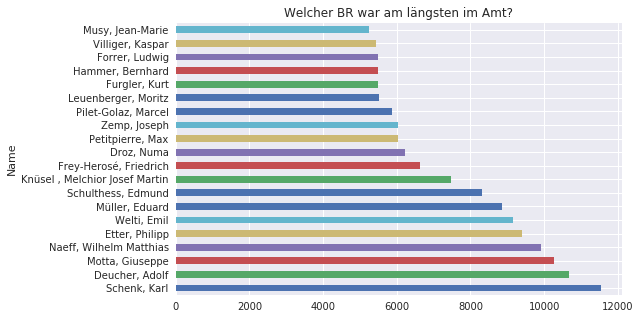

In [36]:
df.groupby("Name")["Zeitspanne"].sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(8,5), title=my_title)

In [46]:
df.groupby("Name")["Zeitspanne"].sum().sort_values(ascending=False).tail(30)

Name
Munzinger, Martin J.       2273
Hoffmann, Arthur           2268
Ochsenbein, Ulrich         2236
Streuli, Hans              2200
Ceresole, Paul             2159
Ruffy, Eugène              2147
Obrecht, Hermann           1945
Felber, René               1939
Honegger, Fritz            1850
Wetter, Ernst              1842
Anderwert , Fridolin       1842
Holenstein, Thomas         1841
Lepori, Giuseppe           1841
Metzler-Arnold, Ruth       1756
Kopp, Elisabeth            1563
Escher, Josef              1547
Bavier , Simeon            1487
Egli, Alphons              1484
Blocher, Christoph         1482
Schobinger, Josef Anton    1258
Borel, Eugène              1119
Heer, Joachim              1117
Parmelin, Guy              1089
Bourgknecht, Jean          1018
Ador, Gustave               918
Weber, Max                  780
Ruffy, Victor               754
Friedrich, Rudolf           682
Cassis, Ignazio             438
Perrier, Louis              430
Name: Zeitspanne, dtype: int64

In [38]:
my_title= ("Wer verliess den BR am Schnellsten wieder?")

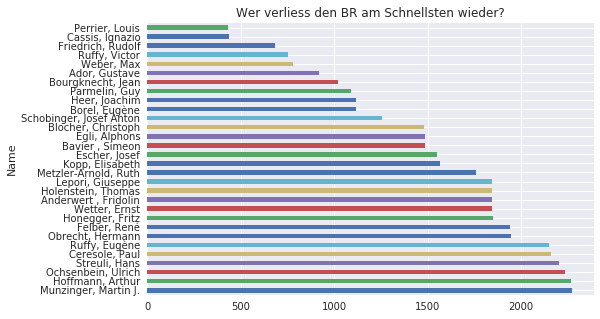

In [39]:
df.groupby("Name")["Zeitspanne"].sum().sort_values(ascending=False).tail(30).plot(kind='barh', figsize=(8,5), title=my_title)

In [ ]:
# Python3 code to convert given  
# number of days in terms of  
# Years, Weeks and Days 
  
DAYS_IN_WEEK = 7
  
# Function to find  
# year, week, days  
def find( number_of_days ): 
  
    # Assume that years is 
    # of 365 days 
    year = int(number_of_days / 365) 
    week = int((number_of_days % 365) / 
                DAYS_IN_WEEK) 
    days = (number_of_days % 365) % DAYS_IN_WEEK 
      
    print("years = ",year, 
          "\nweeks = ",week, 
          "\ndays = ",days) 
      
# Driver Code 
number_of_days = 200
find(number_of_days) 